In [41]:
import pandas as pd

data = pd.read_csv('cleaned_data.csv')

In [43]:
data.head()

,Country Name,year,Access to electricity (% of population),CO2 emissions (metric tons per capita),GDP (constant 2015 US$)
0,Argentina,2016 [YR2016],99.849579,4.201846,5.823766e+11
1,Argentina,2017 [YR2017],100.000000,4.071308,5.987909e+11
2,Argentina,2018 [YR2018],99.989578,3.975772,5.831181e+11
3,Argentina,2019 [YR2019],100.000000,3.740650,5.713045e+11
4,Argentina,2020 [YR2020],100.000000,NaN,5.147724e+11


In [45]:
# First we rename 'year' to 'Year', somehow I forgot it yesterday
data.rename(columns = {'year':'Year'}, inplace = True)

In [47]:
# Then we make the year be just integers
data['Year'] = data['Year'].str.extract(r'(\d{4})')
data['Year'] = data['Year'].astype('int')

In [49]:
data.head()

,Country Name,Year,Access to electricity (% of population),CO2 emissions (metric tons per capita),GDP (constant 2015 US$)
0,Argentina,2016,99.849579,4.201846,5.823766e+11
1,Argentina,2017,100.000000,4.071308,5.987909e+11
2,Argentina,2018,99.989578,3.975772,5.831181e+11
3,Argentina,2019,100.000000,3.740650,5.713045e+11
4,Argentina,2020,100.000000,NaN,5.147724e+11


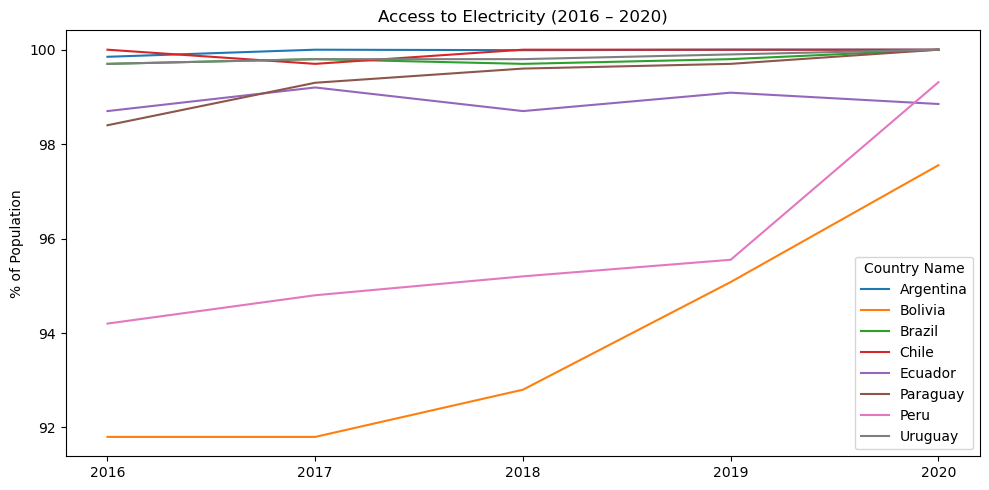

In [119]:
# Now we visualize, yipee.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
sns.lineplot(data = data, x = 'Year', y = 'Access to electricity (% of population)', hue = 'Country Name')
plt.title('Access to Electricity (2016 – 2020)')
plt.ylabel('% of Population')
plt.xlabel('')
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.tight_layout()
plt.show()

### Observations

- **General Observation**: All 8 countries had high electricity access starting from 2016, with minimum levels around **92%**.
- **Bolivia**:  
  - Significant improvement from around **~92% in 2016** to almost **~98% by 2020**.
- **Peru**:  
  - Grew steadily from **~94%** to **~96%**, followed by a sudden surge in 2019 and reach around **99%** in 2020.
- **Ecuador**:  
  - Maintained a high level between **98–99%**, with slight yearly fluctuations.
- **Paraguay**:  
  - Improved from around **~98%** to a full **100%** coverage.
- **Other countries (Argentina, Brazil, Chile, Uruguay)**:  
  - Already had **≥99%** in 2016 and reached **100%** by 2020.

### Summary:
> South America has made strong progress in universal electricity access.  
> By 2020, most countries achieved or nearly achieved full national coverage.

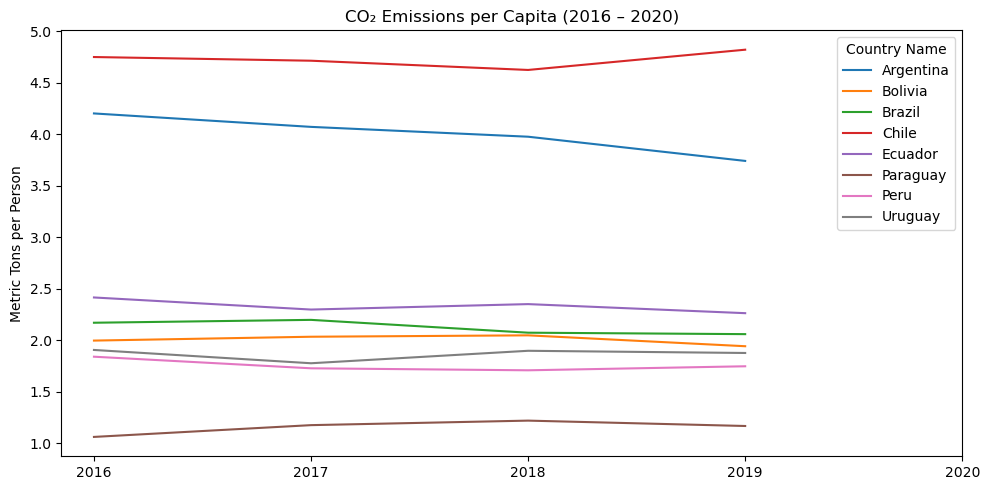

In [117]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = data, x = 'Year', y = 'CO2 emissions (metric tons per capita)', hue = 'Country Name')
plt.title('CO₂ Emissions per Capita (2016 – 2020)')
plt.ylabel('Metric Tons per Person')
plt.xlabel('')
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.tight_layout()
plt.show()

### Observations

- **2020 data is completely missing**: All countries have `NaN` values for the year 2020.
- **Chile**:
   - Has the highest per capita CO₂ emissions among the eight countries.
   - Emissions continued to increase up to 2019.
- **Argentina**:
   - Shows the second highest emission level.
   - Presents a consistent downward trend over the years.
- **Paraguay**:
   - Has the lowest emissions throughout the period.
   - Maintains a stable and low emission level.
- **Other countries (e.g., Brazil, Uruguay, Ecuador, etc.)**:
   - Remain in the mid-range.
   - No strong upward or downward trend observed.

### Summary:
> Argentina and Chile exhibit the most distinct patterns in CO₂ emissions.  
> Paraguay remains consistently low, while other countries are relatively stable.


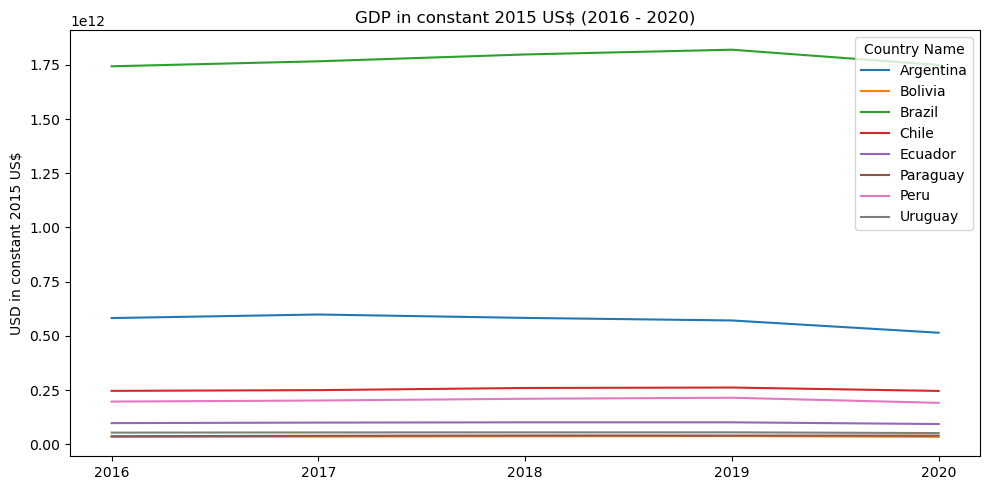

In [125]:
plt.figure(figsize=(10, 5))
sns.lineplot(data = data, x = 'Year', y = 'GDP (constant 2015 US$)', hue = 'Country Name')
plt.title('GDP in constant 2015 US$ (2016 - 2020)')
plt.ylabel('USD in constant 2015 US$')
plt.xlabel('')
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.tight_layout()
plt.show()

### Observations

- Raw GDP values across countries vary significantly in scale, from tens of billions to over a trillion USD.
- Year-over-year changes appear minimal on the chart, likely due to the small percentage growth (typically within ±5%) relative to large absolute values.

### Note:
> The lack of visual fluctuation is expected in raw GDP charts.  
> Further insights may require log-scale transformation or growth rate analysis.

In [141]:
# We use growth rate
gdp_growth_pivot = data.pivot_table(index = 'Year', columns = 'Country Name', values = 'GDP (constant 2015 US$)')
gdp_growth = gdp_growth_pivot.pct_change() * 100 
gdp_growth_melt = gdp_growth.reset_index().melt(id_vars = 'Year', var_name = 'Country', value_name = 'GDP Growth Rate (%)')

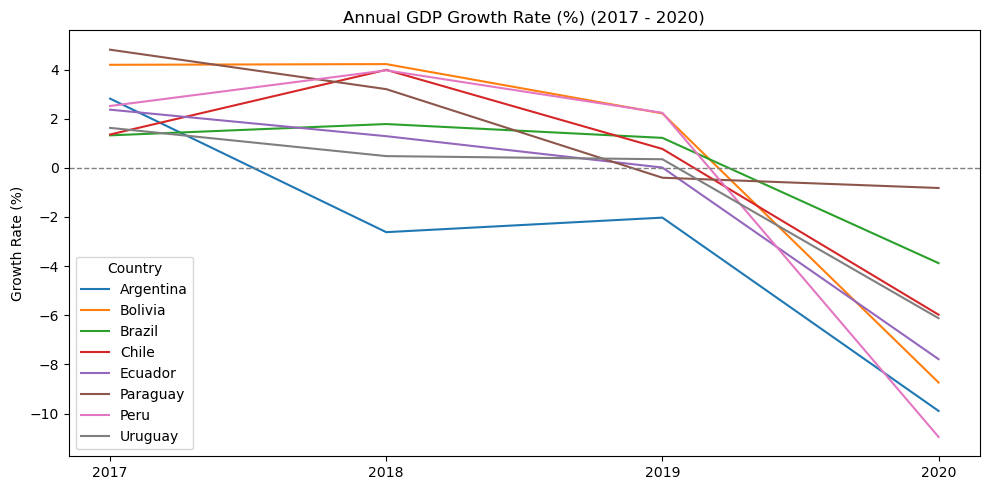

In [149]:
plt.figure(figsize=(10, 5))
sns.lineplot(data = gdp_growth_melt, x = 'Year', y = 'GDP Growth Rate (%)', hue = 'Country')
plt.title('Annual GDP Growth Rate (%) (2017 - 2020)') # Since 2016 is NaN
plt.ylabel('Growth Rate (%)')
plt.xlabel('')
plt.xticks([2017, 2018, 2019, 2020])  
plt.axhline(0, color = 'gray', linestyle = '--', linewidth = 1)  # We add 0% line for reference
plt.tight_layout()
plt.show()

### Observations

- **Argentina**:
   - Showed negative GDP growth starting from 2017.
   - Declined further in 2020, likely because the pandemic.
- **Paraguay**:
   - Also declined in 2020, but the drop was much smaller compared to other countries.
   - The 2020 GDP growth rate stayed close to 0%, indicating relatively better economic.
- **Other countries** (e.g., Brazil, Chile, Ecuador, etc.):
   - Maintained relatively stable positive growth from 2017 to 2019.
   - Experienced sharp declines in 2020 due to the COVID-19 pandemic.

### Summary:
> Most South American countries experienced pandemic-driven economic contraction in 2020.  
> Argentina faced prolonged recession, while Paraguay showed relative stability.

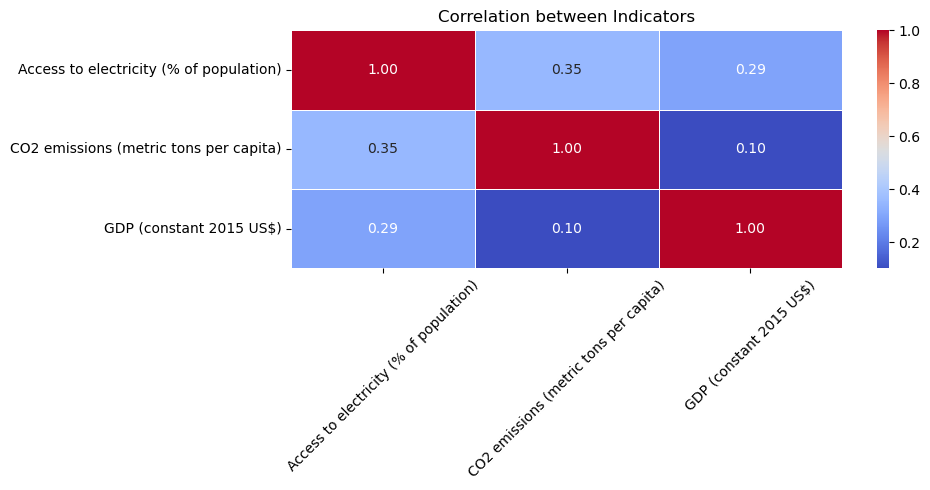

In [169]:
corr_data = data[['Access to electricity (% of population)', 
                  'CO2 emissions (metric tons per capita)',
                  'GDP (constant 2015 US$)']]

# Calculating Pearson correlation
corr_matrix = corr_data.corr(method = 'pearson')

# Making heatmap
plt.figure(figsize = (10, 5))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title('Correlation between Indicators')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Observation:
> Surprisingly, all three pairs show only **weak correlations**.  
> Despite intuitive expectations (e.g., higher GDP leading to higher emissions),  
> the data does not support strong linear relationships across the 8 countries during 2016–2020.